In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt 

In [49]:
train = pd.read_csv("D://SQL//powerbi//Data//Sales Forecasting//train.csv")
train =  train.fillna(0)
features = pd.read_csv("D://SQL//powerbi//Data//Sales Forecasting//features.csv")
features = features.fillna(0)
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
ad_data = pd.merge(features, train, on=["Store", "Date"],how='inner')
ad_data = ad_data.fillna(0)
ad_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [50]:
ad_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,False


In [51]:
print(ad_data.head())
ad_data.info()

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
2      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
3      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
4      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_x  Dept  \
0        0.0        0.0  211.096358         8.106        False     1   
1        0.0        0.0  211.096358         8.106        False     2   
2        0.0        0.0  211.096358         8.106        False     3   
3        0.0        0.0  211.096358         8.106        False     4   
4        0.0        0.0  211.096358         8.106        False     5   

   Weekly_Sales  IsHoliday_y  
0      24924.50        False  
1      50605.27   

In [52]:
ad_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [53]:
ad_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Dept', 'Weekly_Sales', 'IsHoliday_y'],
      dtype='object')

In [54]:
ad_data.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
Store,1.000000,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.000548,0.024004,-0.085195,-0.000548
Temperature,-0.050097,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.155949,0.004437,-0.002312,-0.155949
Fuel_Price,0.065290,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,-0.078281,0.003572,-0.000120,-0.078281
MarkDown1,-0.059844,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.003521,0.001494,0.047172,-0.003521
MarkDown2,-0.033829,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.207604,0.000587,0.020716,0.207604
MarkDown3,-0.020331,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.266471,0.001475,0.038562,0.266471
MarkDown4,-0.042724,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.011565,0.001937,0.037467,0.011565
MarkDown5,-0.012452,-0.014752,0.215420,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.120406,-0.015235,0.002668,0.050465,-0.015235
CPI,-0.211088,0.182112,-0.164210,0.010915,-0.003554,-0.005839,-0.002047,0.067906,1.000000,-0.299953,-0.001944,-0.007477,-0.020921,-0.001944
Unemployment,0.208552,0.096730,-0.033853,-0.105168,-0.041427,-0.018078,-0.076513,-0.120406,-0.299953,1.000000,0.010460,0.007837,-0.025864,0.010460


In [74]:
x = ad_data[['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5', 'CPI']]
y = ad_data.Weekly_Sales

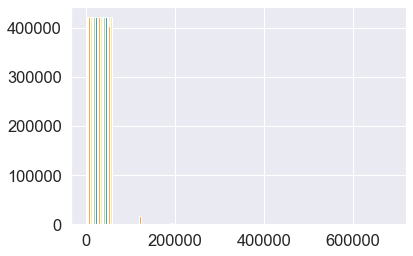

In [78]:
plt.hist(ad_data)
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)
print(X[1:10])

[[-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]
 [-0.42794328 -0.17306886 -0.08466249 -0.27811663 -0.39518081  1.01877417]]


In [58]:
regr.intercept_


15981.25812346704

In [59]:
regr.coef_

array([ 732.68922772,  241.12834133,  849.52189859,  -30.57800794,
        819.65077685, -533.0494106 ])

In [67]:
# y = b0 + b1 x   -- weeekly sales = 15981 + 540 * markdown4 + 1018 * m5 -543 * cpi     x = ad_data[['MarkDown4', 'MarkDown5', 'CPI']]
Sales = 15981+732*(ad_data["MarkDown1"])+241*(ad_data["MarkDown2"])+849*(ad_data["MarkDown3"])-30*(ad_data["MarkDown4"])+819*(ad_data["MarkDown5"])-533*(ad_data["CPI"])
Sales

0        -9.653336e+04
1        -9.653336e+04
2        -9.653336e+04
3        -9.653336e+04
4        -9.653336e+04
              ...     
421565    3.650834e+06
421566    3.650834e+06
421567    3.650834e+06
421568    3.650834e+06
421569    3.650834e+06
Length: 421570, dtype: float64

In [68]:
#print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.00544611810960427
